# Tooploox Data Science exercise

In [40]:
import pandas as pd

dataset = pd.read_csv('./data.csv', header=None)

### Analysing basic statistics for v(24), v(72), v(168)

In [41]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

for i in [24,72,168]:
    print "For %d-th hour: mean = %f, std = %f, median = %d" % (i, dataset[i].mean(), dataset[i].std(), dataset[i].median())

For 24-th hour: mean = 376765.517467, std = 923646.739985, median = 194357
For 72-th hour: mean = 613303.341703, std = 1653969.423316, median = 237417
For 168-th hour: mean = 743209.837336, std = 2007963.831213, median = 252287


### Plotting the distribution of v(168)

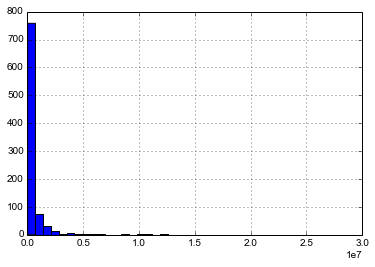

In [42]:
dataset[168].hist(bins = 40)

### Plotting the log-transformed distribution of v(168)

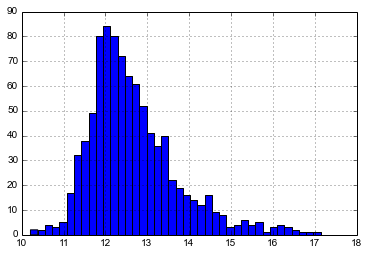

In [43]:
log_168 = dataset[168].apply(lambda x: np.log(x))
log_168.hist(bins = 40)

### Deleting outliers

In [44]:
std_168 = log_168.std()
mean_168 = log_168.mean()

selector = np.abs(log_168 - mean_168) < 3*std_168

print dataset.shape
dataset = dataset.loc[selector]
print dataset.shape

(916, 169)
(901, 169)


### Computing correlation coefficients between v(n) for n = 1, 2, ..., 24 and v(168).

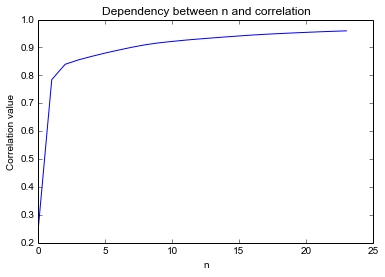

In [45]:
range_1_24 = range(1,25,1)

def log_transform(x):
    x[x==0] = 1
    return np.log(x)

correlations = dataset[range_1_24].apply(log_transform).apply(lambda x: log_168.corr(x))
correlations

plt.plot(correlations, label='Correlation')
plt.xlabel('n')
plt.ylabel('Correlation value')
plt.title('Dependency between n and correlation')


### Train - test split on log-transformed data

In [39]:
from sklearn.cross_validation import train_test_split

range_for_log_transform = range(1, dataset.shape[1])
dataset[range_for_log_transform] = dataset[range_for_log_transform].apply(log_transform)

train, test = train_test_split(dataset, test_size = 0.1)

print train.shape, test.shape

(810, 169) (91, 169)
